In this notebook we try to replicate [Discovering Conservation Laws using Optimal Transport and Manifold Learning](https://doi.org/10.48550/arxiv.2208.14995).

In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm

### Generate trajectories

In [2]:
%mkdir -p trajectories/coupled_oscillator
%mkdir -p trajectories/double_pendulum
%mkdir -p trajectories/harmonic_oscillator
%mkdir -p trajectories/pendulum
%mkdir -p trajectories/kepler_problem
%mkdir -p trajectories/three_body_problem

ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.
ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.
ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.
ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.
ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.
ЋиЁЎЄ  ў бЁ­в ЄбЁбҐ Є®¬ ­¤л.



Creating trajectories for pendulum


200it [00:50,  3.99it/s]



Creating trajectories for harmonic_oscillator


200it [00:01, 109.10it/s]



Creating trajectories for kepler_problem


200it [00:04, 48.20it/s]



Creating trajectories for double_pendulum


200it [16:43,  5.02s/it]



Creating trajectories for coupled_oscillator


200it [00:06, 28.65it/s]


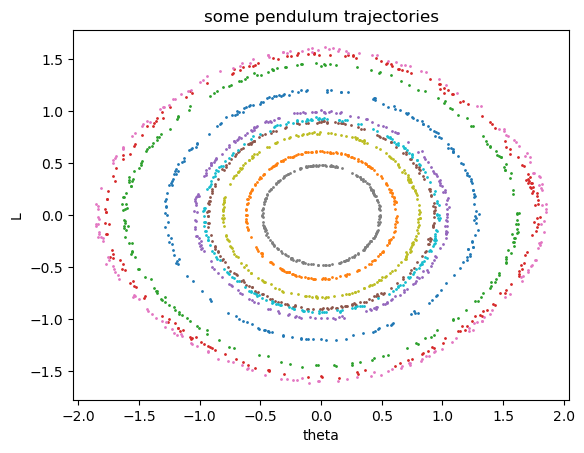

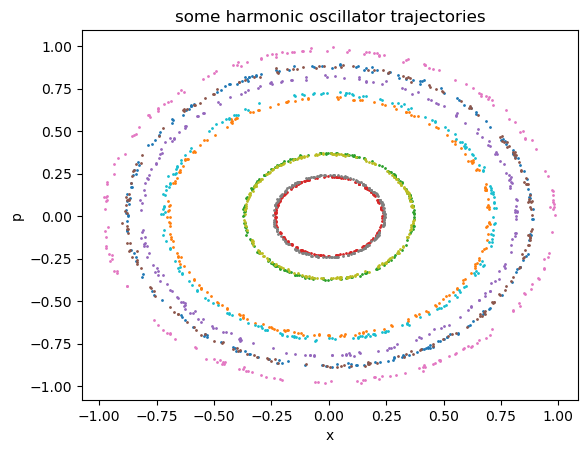

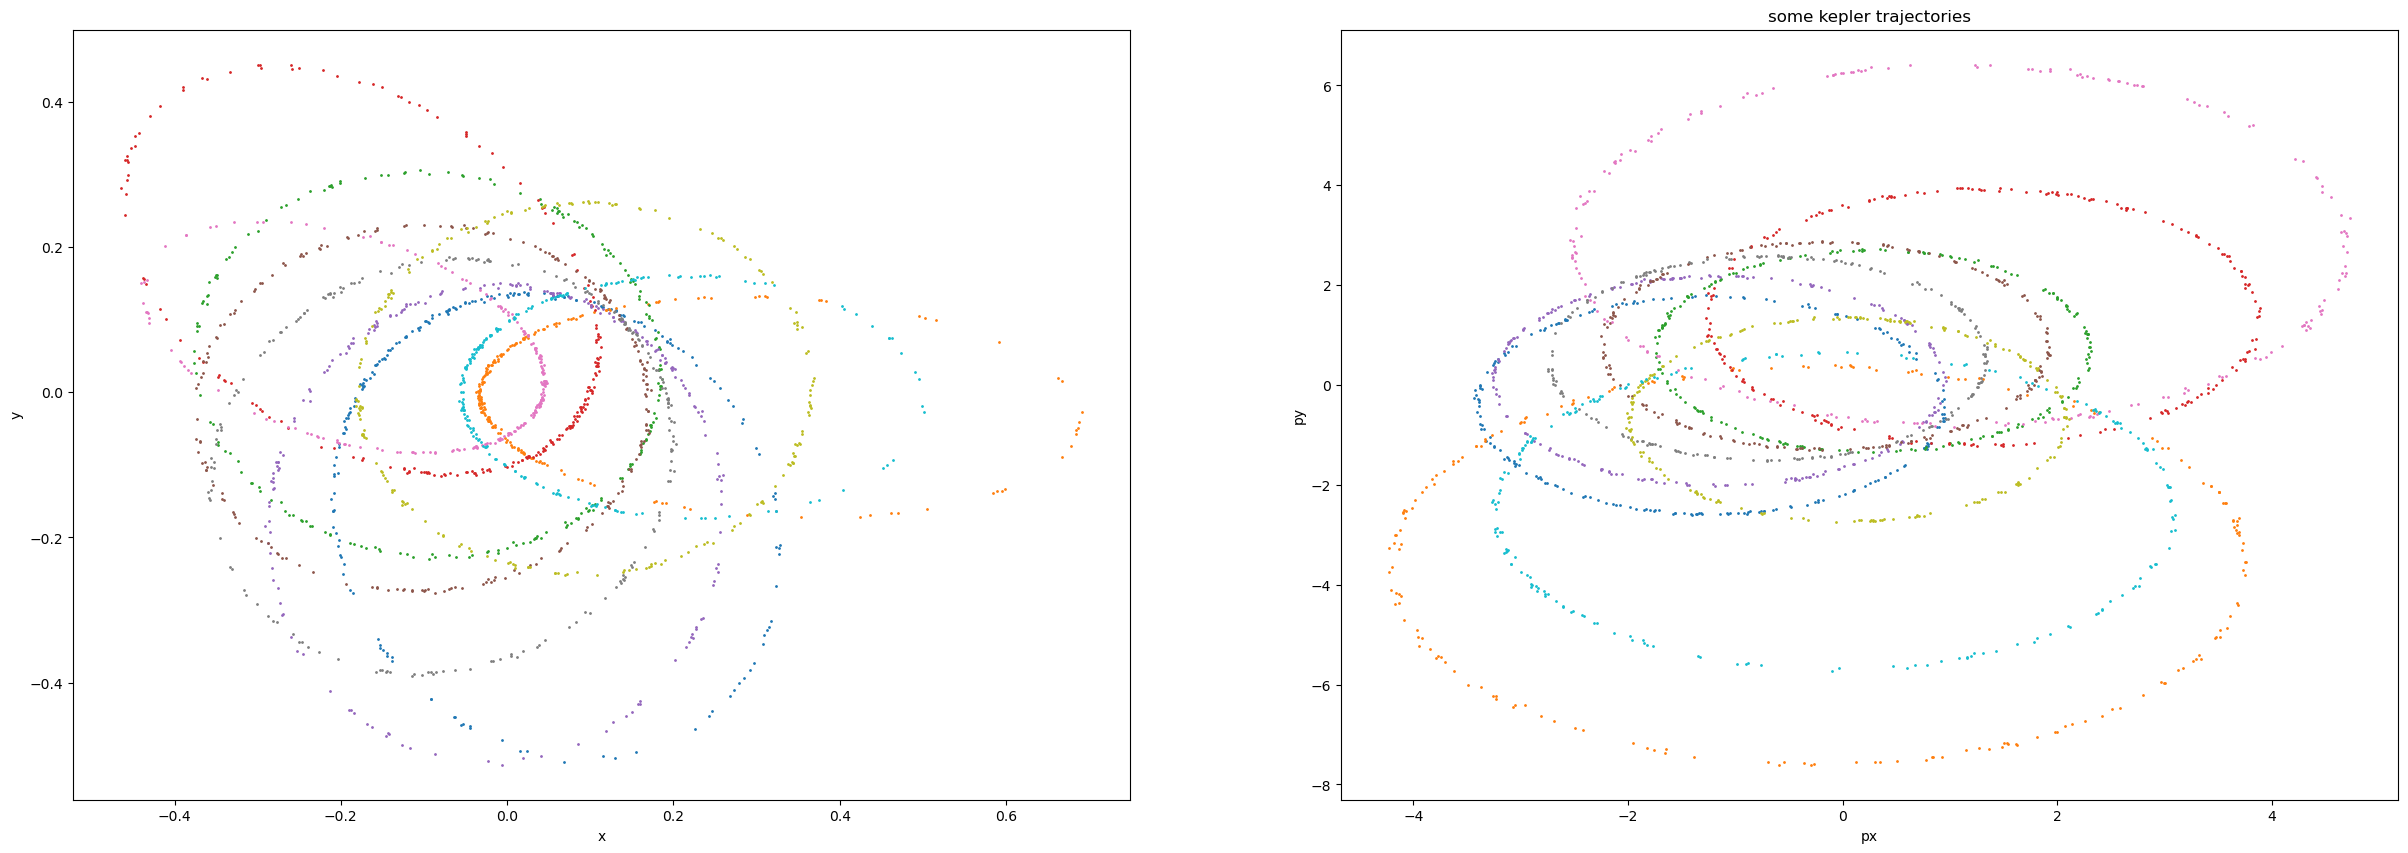

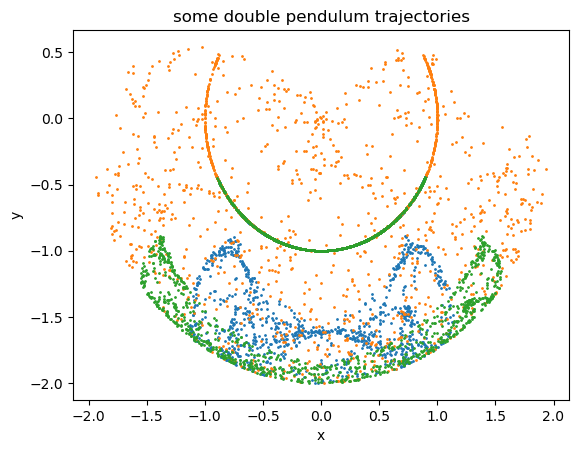

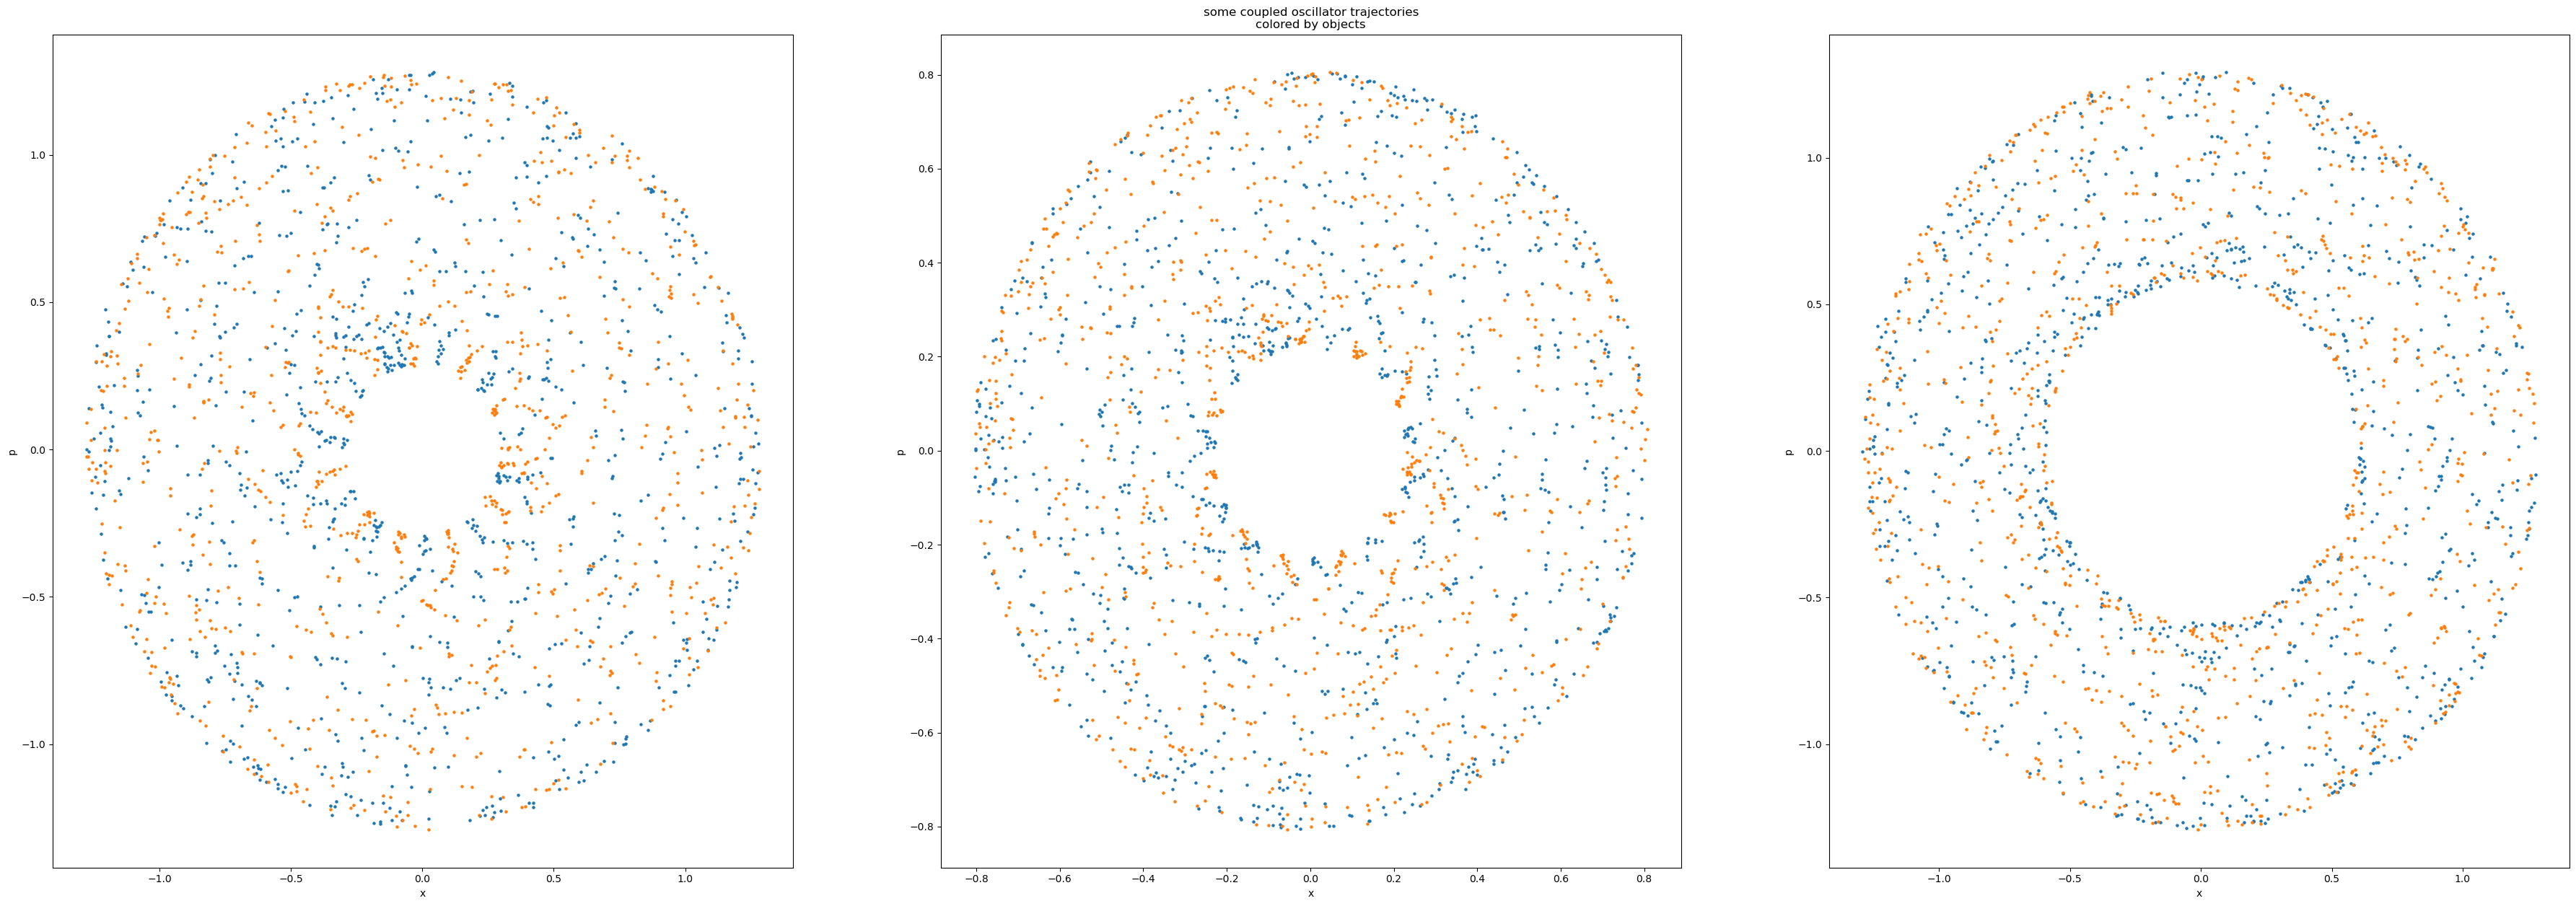

In [3]:
import creating.pendulum as pend
import creating.harmonic_oscillator as ho
import creating.kepler_problem as kp
import creating.double_pendulum as dp
import creating.coupled_oscillator as co


pend.create_trajectories(200)
ho.create_trajectories(200)
kp.create_trajectories(200)
dp.create_trajectories(200)
co.create_trajectories(200)

## Use spectral embedding

In [4]:
import utils

### Pendulum

C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


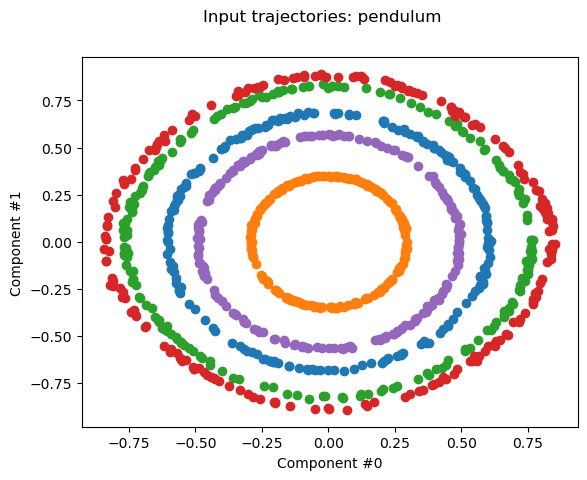

In [5]:
data_p = utils.get_data("pendulum", plot_config=[(0, 1)])

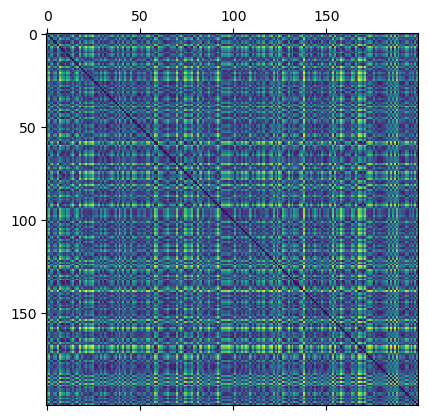

In [6]:
W_P = utils.gen_dist_matrix(data_p)
plt.matshow(W_P)

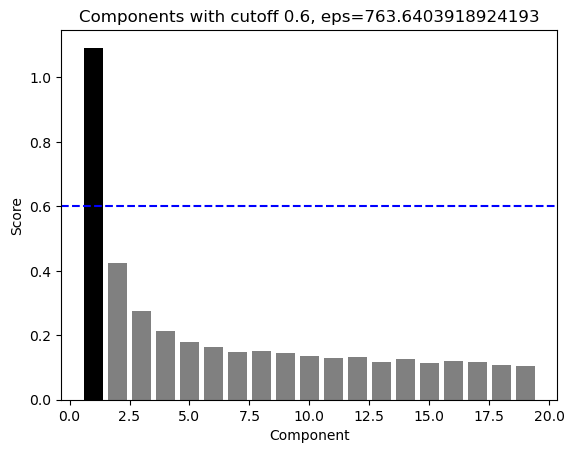

In [7]:
scores, embedding, embed_list = utils.spectral_embedding(W_P, n_neighbors=20)

## Harmonic oscillator

C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


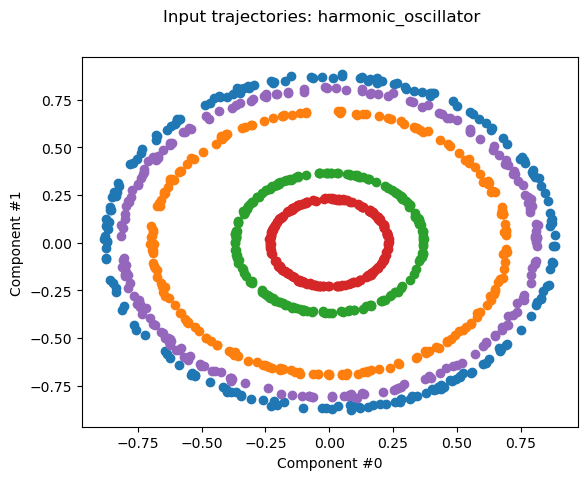

In [8]:
data_h = utils.get_data("harmonic_oscillator", plot_config=[(0, 1)])

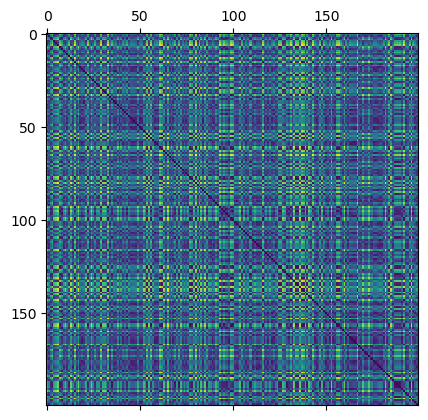

In [9]:
W_H = utils.gen_dist_matrix(data_h)
plt.matshow(W_H)

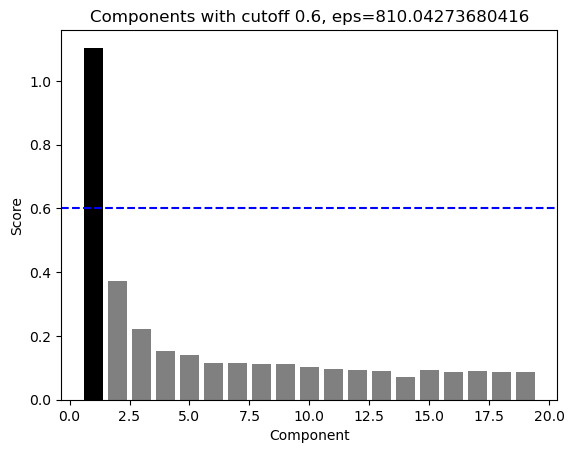

In [10]:
scores, embedding, embed_list = utils.spectral_embedding(W_H, n_neighbors=20)

## Double pendulum

C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


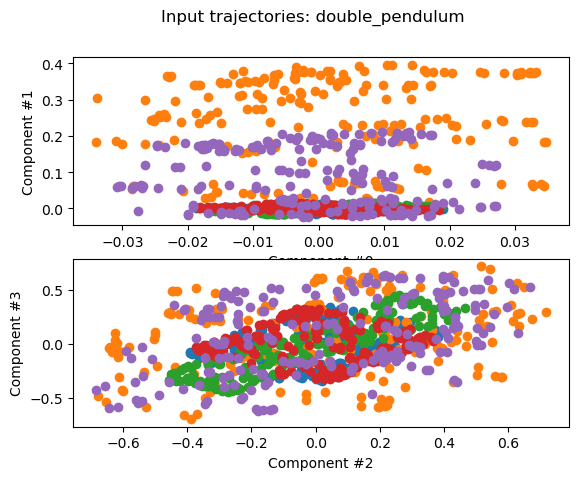

In [11]:
data_dp = utils.get_data("double_pendulum", plot_config=[(0, 1), (2, 3)])

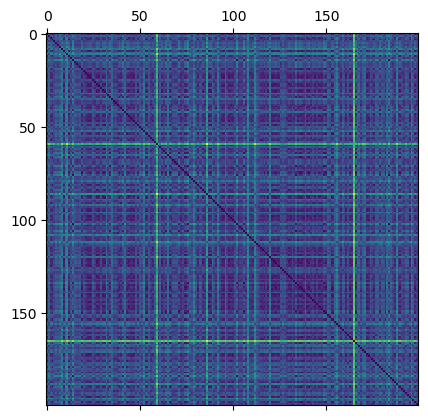

In [12]:
W_DP = utils.gen_dist_matrix(data_dp)
plt.matshow(W_DP)

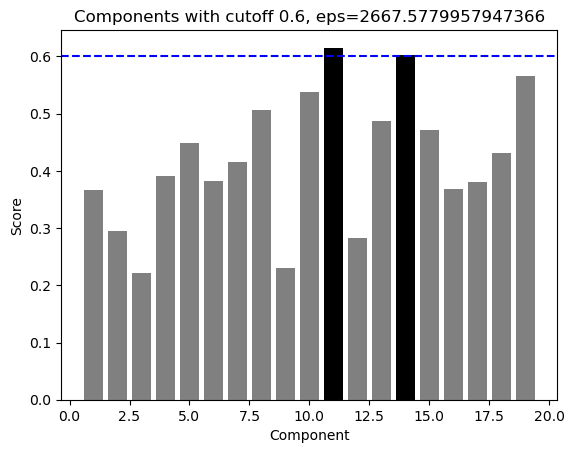

In [13]:
scores, embedding, embed_list = utils.spectral_embedding(W_DP, n_neighbors=35)

## Coupled oscillator

C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


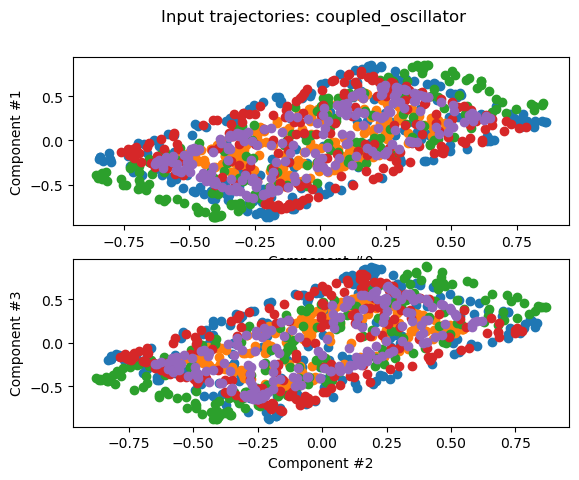

In [14]:
data_co = utils.get_data("coupled_oscillator", plot_config=[(0, 1), (2, 3)])

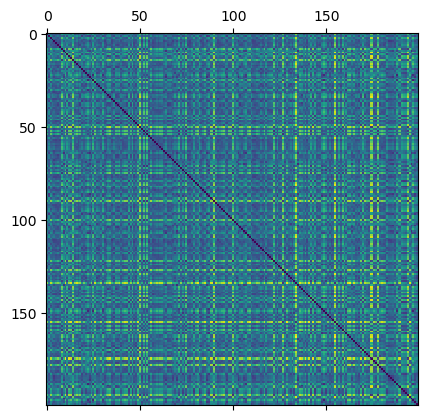

In [15]:
W_CO = utils.gen_dist_matrix(data_co)
plt.matshow(W_CO)

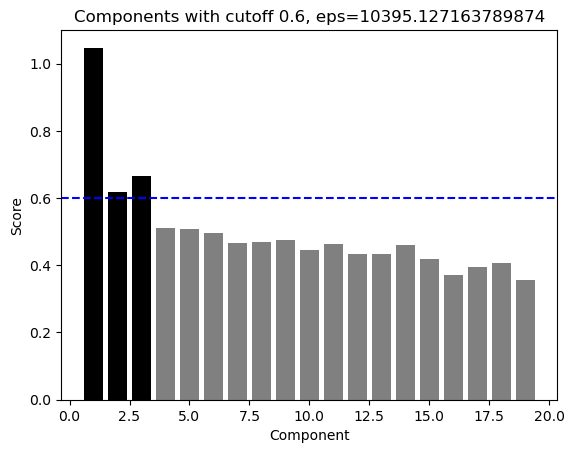

In [31]:
scores, embedding, embed_list = utils.spectral_embedding(W_CO, n_neighbors=100)

## Kepler problem

C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\data_loader.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


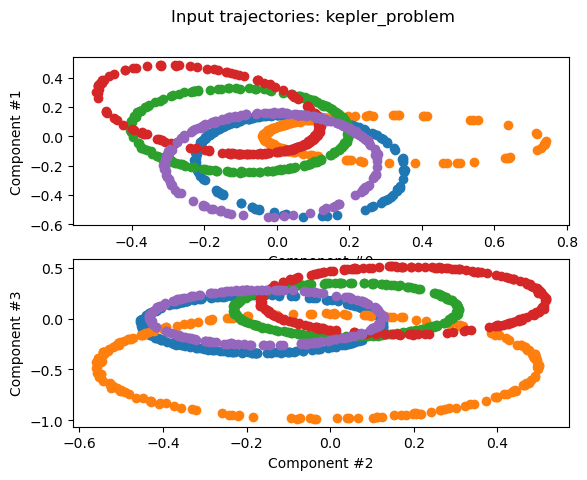

In [17]:
data_kp = utils.get_data("kepler_problem", plot_config=[(0, 1), (2, 3)])

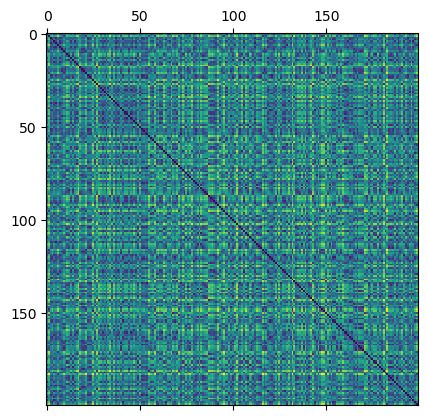

In [18]:
W_KP = utils.gen_dist_matrix(data_kp)
plt.matshow(W_KP)

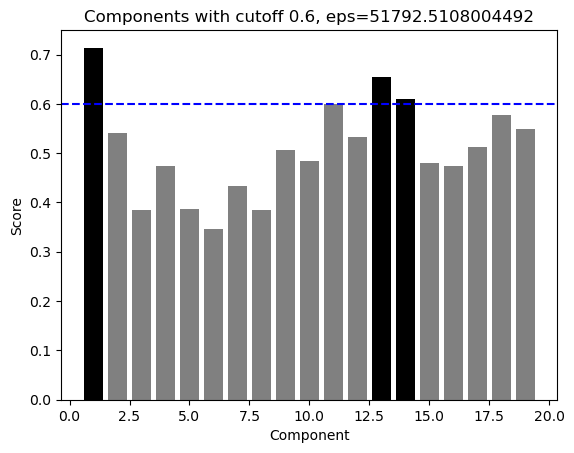

In [30]:
scores, embedding, embed_list = utils.spectral_embedding(W_KP, n_neighbors=197)

## Three body problem

In [20]:
# data_tbp = utils.get_data("three_body_problem", plot_config=[(0, 1), (2, 3)]) # TODO

In [21]:
# W_TBP = utils.gen_dist_matrix(data_tbp)
# plt.matshow(W_TBP)

In [22]:
# scores, embedding, embed_list = utils.spectral_embedding(W_TBP, n_neighbors=40)

## Dependence of embedding size on `n_neighbors`

In [23]:
def calc_embed_sizes(W, n_neighbors_range):
    res = []
    for n_neighbors in tqdm(n_neighbors_range):
        _, _, embed_list = utils.spectral_embedding(W, n_neighbors=n_neighbors, do_plot=False)
        res.append(len(embed_list))
    return res

In [24]:
def try_n_neighbors(W, expected_embed_size: int, experiment_name: str, n_neighbors_range = range(4, 198)):
    embed_sizes = calc_embed_sizes(W, n_neighbors_range)
    colors = ['green' if x == expected_embed_size else 'grey' for x in embed_sizes]
    plt.bar(n_neighbors_range, embed_sizes, color=colors, width=1)
    plt.title(f"Embedding size for {experiment_name} with different n_neighbors. Expected: {expected_embed_size}")

### Pendulum

  0%|          | 0/194 [00:00<?, ?it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:79: RuntimeWarning: invalid value encountered in sqrt
  weights[evals > -1] = np.sqrt(
C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:79: RuntimeWarning: invalid value encountered in sqrt
  weights[evals > -1] = np.sqrt(
  1%|          | 2/194 [00:00<00:14, 12.92it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:79: RuntimeWarning: invalid value encountered in sqrt
  weights[evals > -1] = np.sqrt(
C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:79: RuntimeWarning: invalid value encountered in sqrt
  weights[evals > -1] = np.sqrt(
  2%|▏         | 4/194 [00:00<00:14, 13.08it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:79: RuntimeWarning: invalid value encountered in sqrt
  weights[evals > -1] = np.sqr

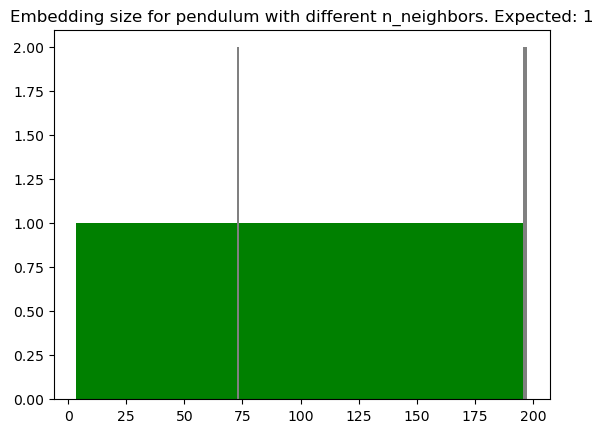

In [25]:
try_n_neighbors(W_P, 1, "pendulum")

  0%|          | 0/194 [00:00<?, ?it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:79: RuntimeWarning: invalid value encountered in sqrt
  weights[evals > -1] = np.sqrt(
C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:79: RuntimeWarning: invalid value encountered in sqrt
  weights[evals > -1] = np.sqrt(
  1%|          | 2/194 [00:00<00:12, 15.09it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:79: RuntimeWarning: invalid value encountered in sqrt
  weights[evals > -1] = np.sqrt(
C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:79: RuntimeWarning: invalid value encountered in sqrt
  weights[evals > -1] = np.sqrt(
  2%|▏         | 4/194 [00:00<00:13, 14.39it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:79: RuntimeWarning: invalid value encountered in sqrt
  weights[evals > -1] = np.sqr

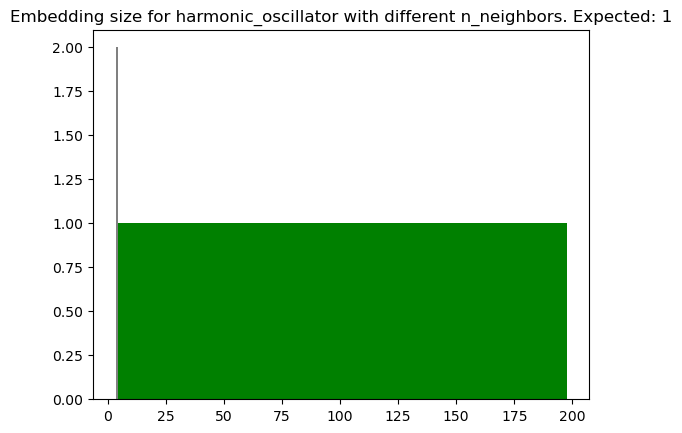

In [26]:
try_n_neighbors(W_H, 1, "harmonic_oscillator")

 32%|███▏      | 63/194 [00:05<00:15,  8.66it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:79: RuntimeWarning: invalid value encountered in sqrt
  weights[evals > -1] = np.sqrt(
 33%|███▎      | 64/194 [00:05<00:14,  8.78it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:79: RuntimeWarning: invalid value encountered in sqrt
  weights[evals > -1] = np.sqrt(
 34%|███▎      | 65/194 [00:05<00:14,  9.02it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:79: RuntimeWarning: invalid value encountered in sqrt
  weights[evals > -1] = np.sqrt(
C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:79: RuntimeWarning: invalid value encountered in sqrt
  weights[evals > -1] = np.sqrt(
 35%|███▍      | 67/194 [00:06<00:13,  9.52it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:79: RuntimeWarning: inval

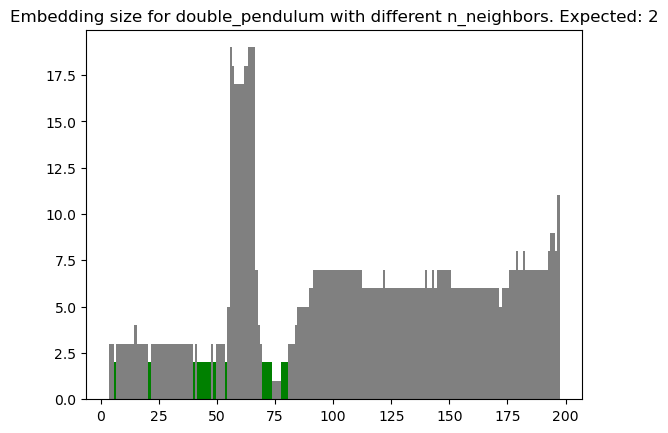

In [27]:
try_n_neighbors(W_DP, 2, "double_pendulum")

100%|██████████| 194/194 [00:17<00:00, 11.10it/s]


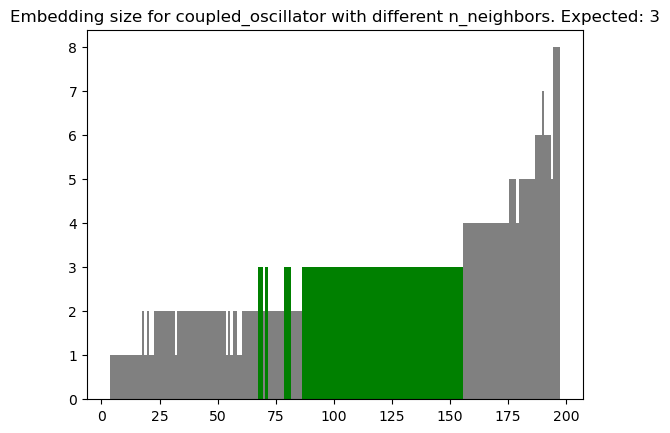

In [28]:
try_n_neighbors(W_CO, 3, "coupled_oscillator")

  0%|          | 0/194 [00:00<?, ?it/s]C:\Users\waleko\Documents\Projects\hse\ai-prentice-conservation-laws\utils\manifold.py:79: RuntimeWarning: invalid value encountered in sqrt
  weights[evals > -1] = np.sqrt(
100%|██████████| 194/194 [00:20<00:00,  9.59it/s]


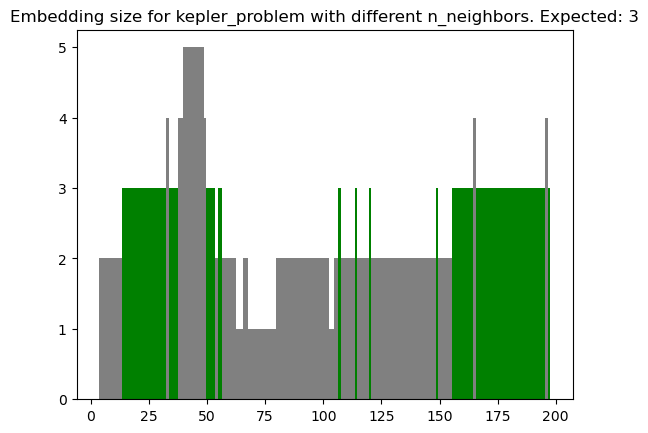

In [29]:
try_n_neighbors(W_KP, 3, "kepler_problem")